In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import json
from prettytable import PrettyTable
from prettytable import MSWORD_FRIENDLY,MARKDOWN
import os
import pandas as pd

In [2]:
dir_name = 'data/newZernikeData'
dataDir = os.listdir(dir_name)

In [3]:
class DataSet:
    def __init__(self):
        self.data = []
    def makePrettyTable(columns, labels):
        table = PrettyTable()
        for i in range(len(columns)):
            table.add_column(labels[i], columns[i])
        return table
           

In [4]:
blankItem = {
    'th1': 0.2,
    'th2': 0.2,
    'th3': 1.2,
    'tiltX1': 0,
    'tiltY1': 0,
    'tiltX2': 0,
    'tiltY2': 0,
    'tiltX3': 0,
    'tiltY3': 0,
    'dcx1': 0,
    'dcy1': 0,
    'dcx2': 0,
    'dcy2': 0,
    'dcx3': 0,
    'dcy3': 0,
    'foc_surf': 0,
    'min_MTF': 'undefined',
    'max_RMS': 'undefined',
    'zernikes': 'undefined'
}

In [5]:
paramNames = ['th1', 'th2', 'th3', 'tiltX1', 'tiltY1', 'tiltX2', 'tiltY2', 'tiltX3', 'tiltY3', 'dcx1', 'dcy1', 'dcx2', 'dcy2', 'dcx3', 'dcy3']

In [6]:
zernNames =  ['tilt_hor', 'tilt_vert', 'defocus', 'astigmatism_obl', 'astigmatism_vert', 'coma_vert', 'coma_hor']

In [7]:
class ZernikeAnalysis(DataSet):
   
    def addData(self, fileName):
        with open(fileName, "r") as read_file:
            newData = json.load(read_file)
            newFormData = []
            for el in newData:
                if (el['zernikes'] != 'undefined'):
                    newItem = blankItem.copy()
                    keys = el.keys()
                    for key in keys:
                        newItem[key] = el[key]
                    newFormData.append(newItem)
            self.data = self.data + newFormData
            #self.x = [[float(el['th1']),float(el['th2']), float(el['th3'])] for el in self.data]
    def addDataDir(self, dir_name):
        dataDir = os.listdir(dir_name)
        for file in dataDir:
            self.addData(dir_name+ '/'+file)
    def getByChangedColumns(self, changedColumns):
        filtered = []
        allValues = []
        for item in self.data:
            correct = True
            for col in paramNames:
                if (col not in changedColumns) and (item[col] != blankItem[col] ):
                    correct = False
            if correct:
                vals = [item[col] for col in changedColumns]
                #print(vals)
                if vals not in allValues:
                    filtered.append(item)
                    allValues.append(vals)
        #print(allValues)
        return filtered

In [8]:
zern = ZernikeAnalysis()

In [9]:
zern.addDataDir('data/newZernikeData')

In [13]:

with open(fileName, "r") as read_file:
            newData = json.load(read_file)

ValueError: Invalid file path or buffer object type: <class 'list'>

In [124]:
blanks = zern.getByChangedColumns([])

[[]]


list

In [41]:
only_th1 = zern.getByChangedColumns(['th1'])

In [127]:
len(only_dcX1)

8

In [29]:
only_tiltX1 = zern.getByChangedColumns(['tiltX1'])

In [42]:
only_th1_tiltX1 = zern.getByChangedColumns(['th1', 'tiltX1'])

In [43]:
only_th1_tiltX1[0]['zernikes'][0]

{'wavelength': 0.4,
 'fieldX': 0.0,
 'fieldY': 0.0,
 'tilt_hor': 1.5031015267238844e-18,
 'tilt_vert': -8.204828942400348e-18,
 'defocus': -0.0005748071197096173,
 'astigmatism_obl': 1.818392416139908e-18,
 'astigmatism_vert': -6.798923370122721e-18,
 'coma_vert': -6.238182489357192e-18,
 'coma_hor': -2.1111256709592762e-18}

In [44]:
def checkLinearity(ars, a12, cols):
    z_all = []
    wls = len(a12[0]['zernikes'])
    #print(len(ars))
    for item in a12:
        items = []
        hasData = True
#         it1 = list(filter(lambda x: x == item[cols[0]], a1))
        for i in range(len(ars)):
            it_ = list(filter(lambda x: x[cols[i]] == item[cols[i]], ars[i]))
            if len(it_) == 0:
                hasData = False
            else:
                it = it_[0]
                items.append(it)
        #print('contr items', items)
        #return items, item
        if hasData:
            zs = [it['zernikes'] for it in items]
            z_superpos = []
            z_quality = []
            for w_zern_ind in range(wls):
                z_superpos_el = {}
                z_quality_el = {}
                for z in zernNames:
                    zernike_item_ar = [zern_data[w_zern_ind][z] for zern_data in zs]
                    z_superpos_el[z] = sum(zernike_item_ar)
                    z_quality_el[z]= 2*np.abs(z_superpos_el[z] - item['zernikes'][w_zern_ind][z])/np.abs(z_superpos_el[z] + item['zernikes'][w_zern_ind][z])
                #return z_superpos_el
                z_superpos.append(z_superpos_el)
                z_quality.append(z_quality_el)
#                     #print(z_all)
#                     if (len(z_all)> 0):
#                         print(w_zern_ind, z, z_all[0]['z_superpos'][0]['tilt_vert'] )
#                     #print(z, zernike_item_ar, sum(zernike_item_ar))
#                 #return z_superpos[w_zern_ind]
            z_all.append({
                'isolated': items.copy(),
                'zs_isol': zs.copy(),
                'z_superpos':z_superpos.copy(),
                'z_real': item['zernikes'],
                'z_quality': z_quality.copy()
            })
            #return z_all
    return z_all

In [45]:
res = checkLinearity([only_th1, only_tiltX1], only_th1_tiltX1, ['th1', 'tiltX1'])

<ipython-input-44-3c41c0471788>:28: RuntimeWarning: invalid value encountered in double_scalars
  z_quality_el[z]= 2*np.abs(z_superpos_el[z] - item['zernikes'][w_zern_ind][z])/np.abs(z_superpos_el[z] + item['zernikes'][w_zern_ind][z])
<ipython-input-44-3c41c0471788>:28: RuntimeWarning: divide by zero encountered in double_scalars
  z_quality_el[z]= 2*np.abs(z_superpos_el[z] - item['zernikes'][w_zern_ind][z])/np.abs(z_superpos_el[z] + item['zernikes'][w_zern_ind][z])


In [513]:
res[0]['zs_isol'][1]

2

In [23]:
len(zernNames)

7

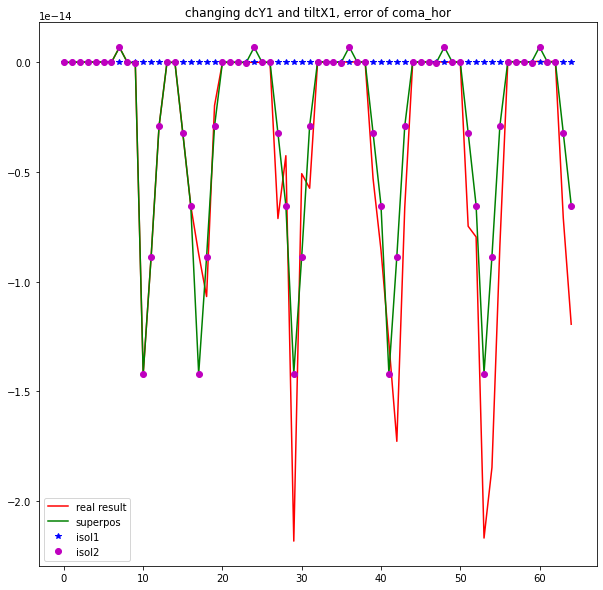

In [56]:
key = zernNames[6]
y1 = [res[i]['z_real'][2][key] for i in range(len(res))]
y2 = [res[i]['z_superpos'][2][key] for i in range(len(res))]
y3 = [res[i]['zs_isol'][0][2][key] for i in range(len(res))]
y4 = [res[i]['zs_isol'][1][2][key] for i in range(len(res))]
x = [i for i in range(len(res))]
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.title('changing dcY1 and tiltX1, error of '+ str(key))
plt.plot(x, y1,  c='r', label='real result')
plt.plot(x, y2, c='g', label = 'superpos')
plt.plot(x, y3, '*', c='b', label = 'isol1')
plt.plot(x, y4, 'o', c='m', label='isol2')
plt.legend()

In [483]:
res[0]['z_real'][0]

{'wavelength': 0.4,
 'fieldX': 0.0,
 'fieldY': 0.0,
 'tilt_hor': -0.4009250217333581,
 'tilt_vert': 9.71445146547012e-17,
 'defocus': -0.008312957842812857,
 'astigmatism_obl': 2.0008559991003822e-17,
 'astigmatism_vert': 0.030645660422778335,
 'coma_vert': -4.163336342344337e-17,
 'coma_hor': -0.1449293408425418}

In [484]:
res[0]['z_superpos'][0]

{'tilt_hor': -0.4009250217333581,
 'tilt_vert': 8.893968571230085e-17,
 'defocus': -0.008887764962522474,
 'astigmatism_obl': 2.182695240714373e-17,
 'astigmatism_vert': 0.030645660422778328,
 'coma_vert': -4.787154591280056e-17,
 'coma_hor': -0.1449293408425418}

In [469]:
zs_isol0 = res[0]['zs_isol'][0][0]
zs_isol1 = res[0]['zs_isol'][1][0]

In [470]:
zs_isol0

{'wavelength': 0.4,
 'fieldX': 0.0,
 'fieldY': 0.0,
 'tilt_hor': -0.4009250217333581,
 'tilt_vert': 9.71445146547012e-17,
 'defocus': -0.008312957842812857,
 'astigmatism_obl': 2.0008559991003822e-17,
 'astigmatism_vert': 0.030645660422778335,
 'coma_vert': -4.163336342344337e-17,
 'coma_hor': -0.1449293408425418}

In [471]:
zs_isol1

{'wavelength': 0.4,
 'fieldX': 0.0,
 'fieldY': 0.0,
 'tilt_hor': 1.5031015267238844e-18,
 'tilt_vert': -8.204828942400348e-18,
 'defocus': -0.0005748071197096173,
 'astigmatism_obl': 1.818392416139908e-18,
 'astigmatism_vert': -6.798923370122721e-18,
 'coma_vert': -6.238182489357192e-18,
 'coma_hor': -2.1111256709592762e-18}

In [474]:
res[0]['z_superpos'][0]

{'tilt_hor': -0.4009250217333581,
 'tilt_vert': 8.893968571230085e-17,
 'defocus': -0.008887764962522474,
 'astigmatism_obl': 2.182695240714373e-17,
 'astigmatism_vert': 0.030645660422778328,
 'coma_vert': -4.787154591280056e-17,
 'coma_hor': -0.1449293408425418}